# DSI Instructor challenge 6/25/18

https://gist.github.com/LibbyFender/68e40a5d81bcf2d953e8cc8ca8686b5a

# Import packages

In [1]:
import pandas as pd
import sklearn as sk
import csv

import operator
from functools import reduce
from pydoc import help  #type `help(name of function)` 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt_kwargs = {'figsize': (9, 9)}
%matplotlib inline

In [2]:
import sklearn.preprocessing
from sklearn import metrics, cross_validation
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.utils import resample

C:\Users\Elizabeth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from pandas import scatter_matrix
from matplotlib import cm

# Load Datafile with headings

In [4]:
with open('ModelingChallenge/field_names.txt', newline='') as inputfile:
    results = list(csv.reader(inputfile))

In [5]:
results = reduce(operator.concat, results)

In [6]:
#results

In [7]:
df = pd.read_csv('ModelingChallenge/breast-cancer.csv', names=results)

# Initial Exploration

In [8]:
df.head()

ID diagnosis  radius_mean  radius_sd_error  radius_worst  \
0    842302         M        17.99            10.38        122.80   
1    842517         M        20.57            17.77        132.90   
2  84300903         M        19.69            21.25        130.00   
3  84348301         M        11.42            20.38         77.58   
4  84358402         M        20.29            14.34        135.10   

   texture_mean  texture_sd_error  texture_worst  perimeter_mean  \
0        1001.0           0.11840        0.27760          0.3001   
1        1326.0           0.08474        0.07864          0.0869   
2        1203.0           0.10960        0.15990          0.1974   
3         386.1           0.14250        0.28390          0.2414   
4        1297.0           0.10030        0.13280          0.1980   

   perimeter_sd_error           ...             concavity_worst  \
0             0.14710           ...                       25.38   
1             0.07017           ...                       24.99   
2             0.12790           ...                       23.57   
3             0.10520           ...                       14.91   
4             0.10430           ...                       22.54   

   concave_points_mean  concave_points_sd_error  concave_points_worst  \
0                17.33                   184.60                2019.0   
1                23.41                   158.80                1956.0   
2                25.53                   152.50                1709.0   
3                26.50                    98.87                 567.7   
4                16.67                   152.20                1575.0   

   symmetry_mean  symmetry_sd_error  symmetry_worst  fractal_dimension_mean  \
0         0.1622             0.6656          0.7119                  0.2654   
1         0.1238             0.1866          0.2416                  0.1860   
2         0.1444             0.4245          0.4504                  0.2430   
3         0.2098             0.8663          0.6869                  0.2575   
4         0.1374             0.2050          0.4000                  0.1625   

   fractal_dimension_sd_error  fractal_dimension_worst  
0                      0.4601                  0.11890  
1                      0.2750                  0.08902  
2                      0.3613                  0.08758  
3                      0.6638                  0.17300  
4                      0.2364                  0.07678  

[5 rows x 32 columns]

In [9]:
df.dtypes

ID                              int64
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mea

In [10]:
df.diagnosis.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [11]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [12]:
df.describe()

ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  5.690000e+02   569.000000       569.000000    569.000000    569.000000   
mean   3.037183e+07    14.127292        19.289649     91.969033    654.889104   
std    1.250206e+08     3.524049         4.301036     24.298981    351.914129   
min    8.670000e+03     6.981000         9.710000     43.790000    143.500000   
25%    8.692180e+05    11.700000        16.170000     75.170000    420.300000   
50%    9.060240e+05    13.370000        18.840000     86.240000    551.100000   
75%    8.813129e+06    15.780000        21.800000    104.100000    782.700000   
max    9.113205e+08    28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        569.000000     569.000000      569.000000          569.000000   
mean           0.096360       0.104341        0.088799            0.048919   
std            0.014064       0.052813        0.079720            0.038803   
min            0.052630       0.019380        0.000000            0.000000   
25%            0.086370       0.064920        0.029560            0.020310   
50%            0.095870       0.092630        0.061540            0.033500   
75%            0.105300       0.130400        0.130700            0.074000   
max            0.163400       0.345400        0.426800            0.201200   

       perimeter_worst           ...             concavity_worst  \
count       569.000000           ...                  569.000000   
mean          0.181162           ...                   16.269190   
std           0.027414           ...                    4.833242   
min           0.106000           ...                    7.930000   
25%           0.161900           ...                   13.010000   
50%           0.179200           ...                   14.970000   
75%           0.195700           ...                   18.790000   
max           0.304000           ...                   36.040000   

       concave_points_mean  concave_points_sd_error  concave_points_worst  \
count           569.000000               569.000000            569.000000   
mean             25.677223               107.261213            880.583128   
std               6.146258                33.602542            569.356993   
min              12.020000                50.410000            185.200000   
25%              21.080000                84.110000            515.300000   
50%              25.410000                97.660000            686.500000   
75%              29.720000               125.400000           1084.000000   
max              49.540000               251.200000           4254.000000   

       symmetry_mean  symmetry_sd_error  symmetry_worst  \
count     569.000000         569.000000      569.000000   
mean        0.132369           0.254265        0.272188   
std         0.022832           0.157336        0.208624   
min         0.071170           0.027290        0.000000   
25%         0.116600           0.147200        0.114500   
50%         0.131300           0.211900        0.226700   
75%         0.146000           0.339100        0.382900   
max         0.222600           1.058000        1.252000   

       fractal_dimension_mean  fractal_dimension_sd_error  \
count              569.000000                  569.000000   
mean                 0.114606                    0.290076   
std                  0.065732                    0.061867   
min                  0.000000                    0.156500   
25%                  0.064930                    0.250400   
50%                  0.099930                    0.282200   
75%                  0.161400                    0.317900   
max                  0.291000                    0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460

In [13]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
print('', 357/569, ':Benign\n', 212/569, ':Malignant')

 0.6274165202108963 :Benign
 0.37258347978910367 :Malignant


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In [16]:
dont_plot = ['ID', 'diagnosis']

radius_mean                       AxesSubplot(0.08,0.816017;0.255882x0.0639831)
radius_sd_error               AxesSubplot(0.387059,0.816017;0.255882x0.0639831)
radius_worst                  AxesSubplot(0.694118,0.816017;0.255882x0.0639831)
texture_mean                      AxesSubplot(0.08,0.739237;0.255882x0.0639831)
texture_sd_error              AxesSubplot(0.387059,0.739237;0.255882x0.0639831)
texture_worst                 AxesSubplot(0.694118,0.739237;0.255882x0.0639831)
perimeter_mean                    AxesSubplot(0.08,0.662458;0.255882x0.0639831)
perimeter_sd_error            AxesSubplot(0.387059,0.662458;0.255882x0.0639831)
perimeter_worst               AxesSubplot(0.694118,0.662458;0.255882x0.0639831)
area_mean                         AxesSubplot(0.08,0.585678;0.255882x0.0639831)
area_sd_error                 AxesSubplot(0.387059,0.585678;0.255882x0.0639831)
area_worst                    AxesSubplot(0.694118,0.585678;0.255882x0.0639831)
smoothness_mean                   AxesSu

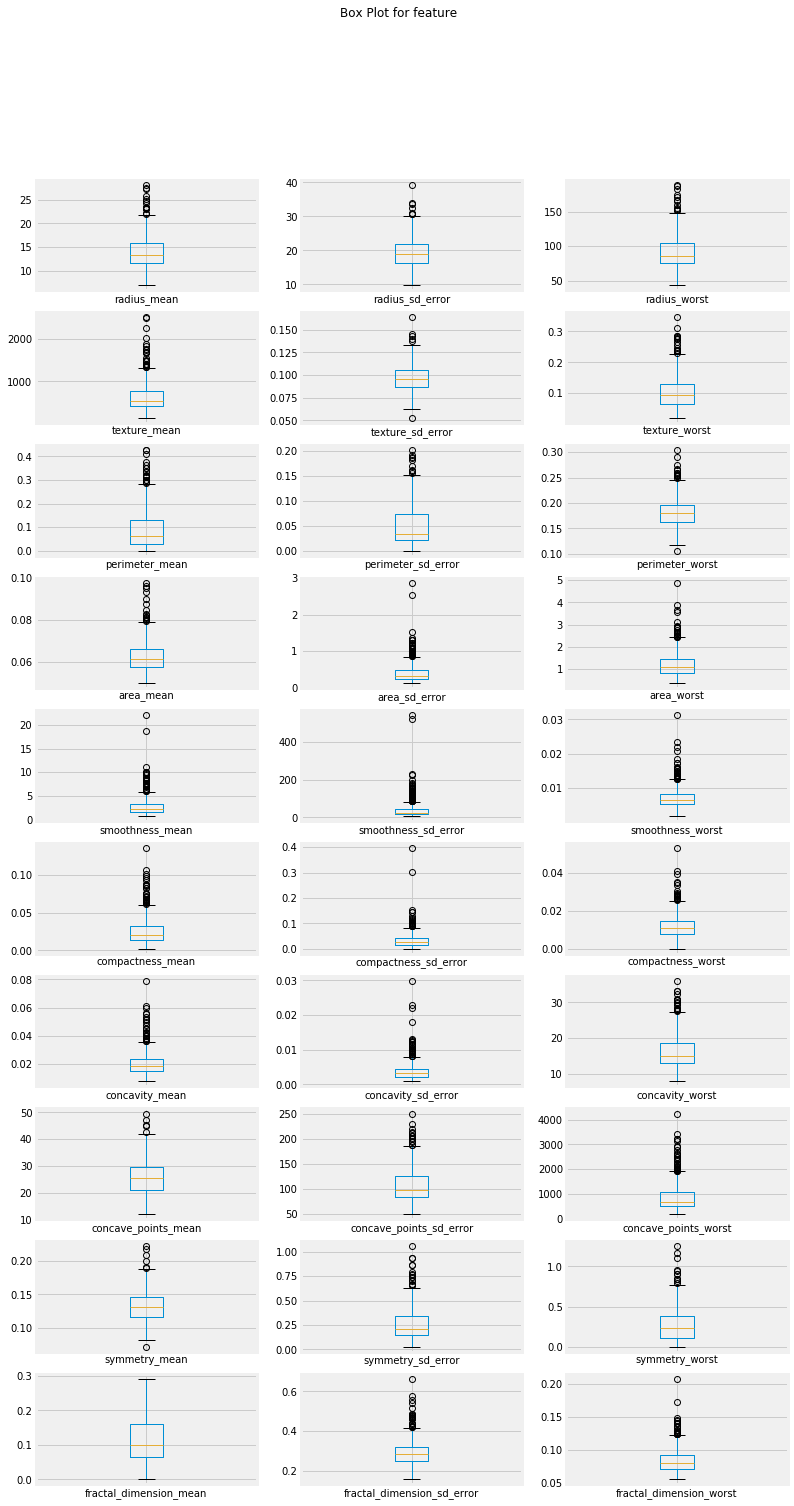

In [17]:
df.drop(dont_plot, axis=1).plot(kind='box', subplots=True, layout=(10, 3), sharex=False, sharey=False, figsize = (12,24), title ='Box Plot for feature')

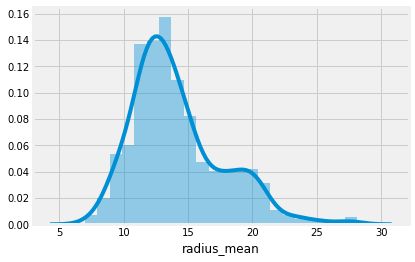

In [18]:
sns.distplot(df['radius_mean'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001416CF95550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001416E58DCC0>]], dtype=object)

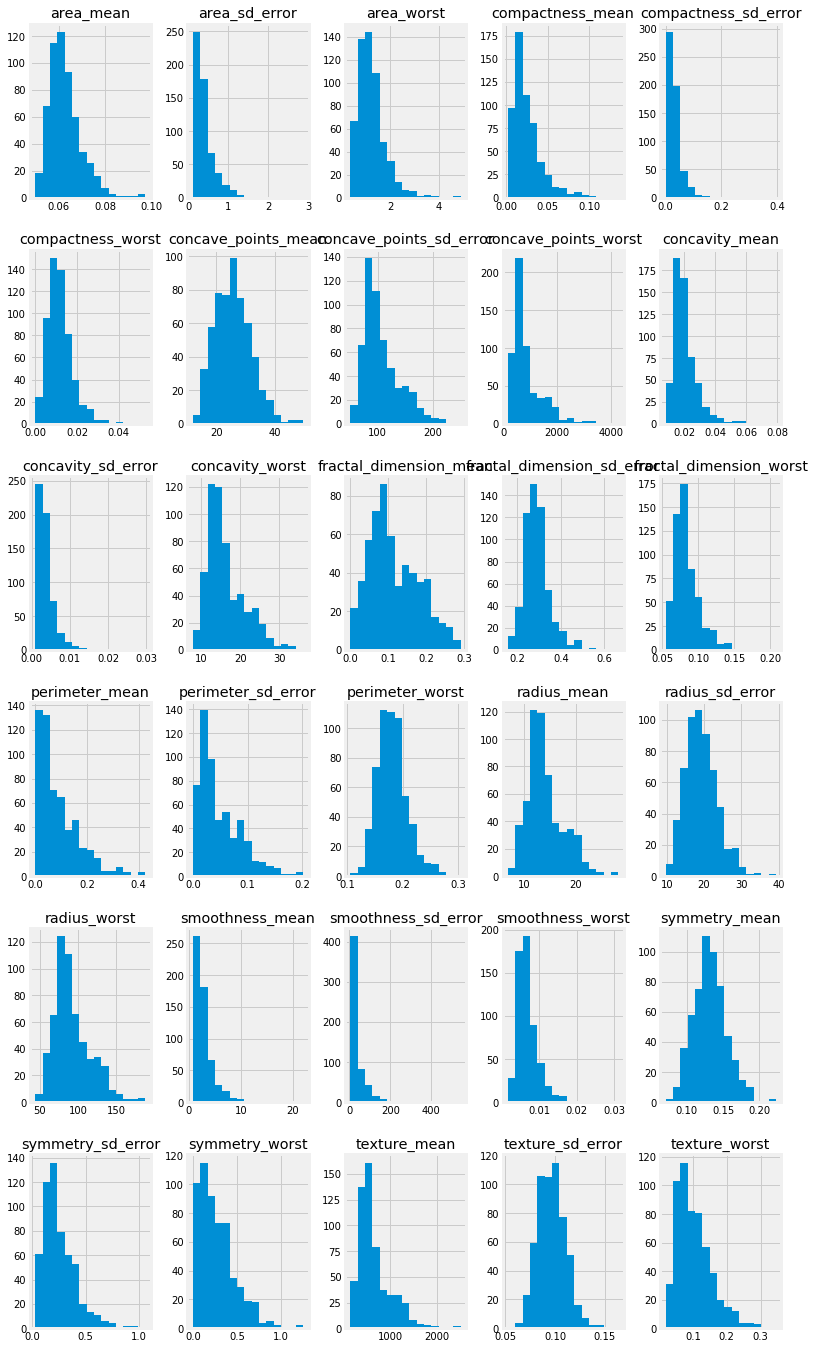

In [19]:
df.drop(dont_plot, axis=1).hist(bins=15, figsize = (12,24))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001416E5D86D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001416EFAA6A0>]], dtype=object)

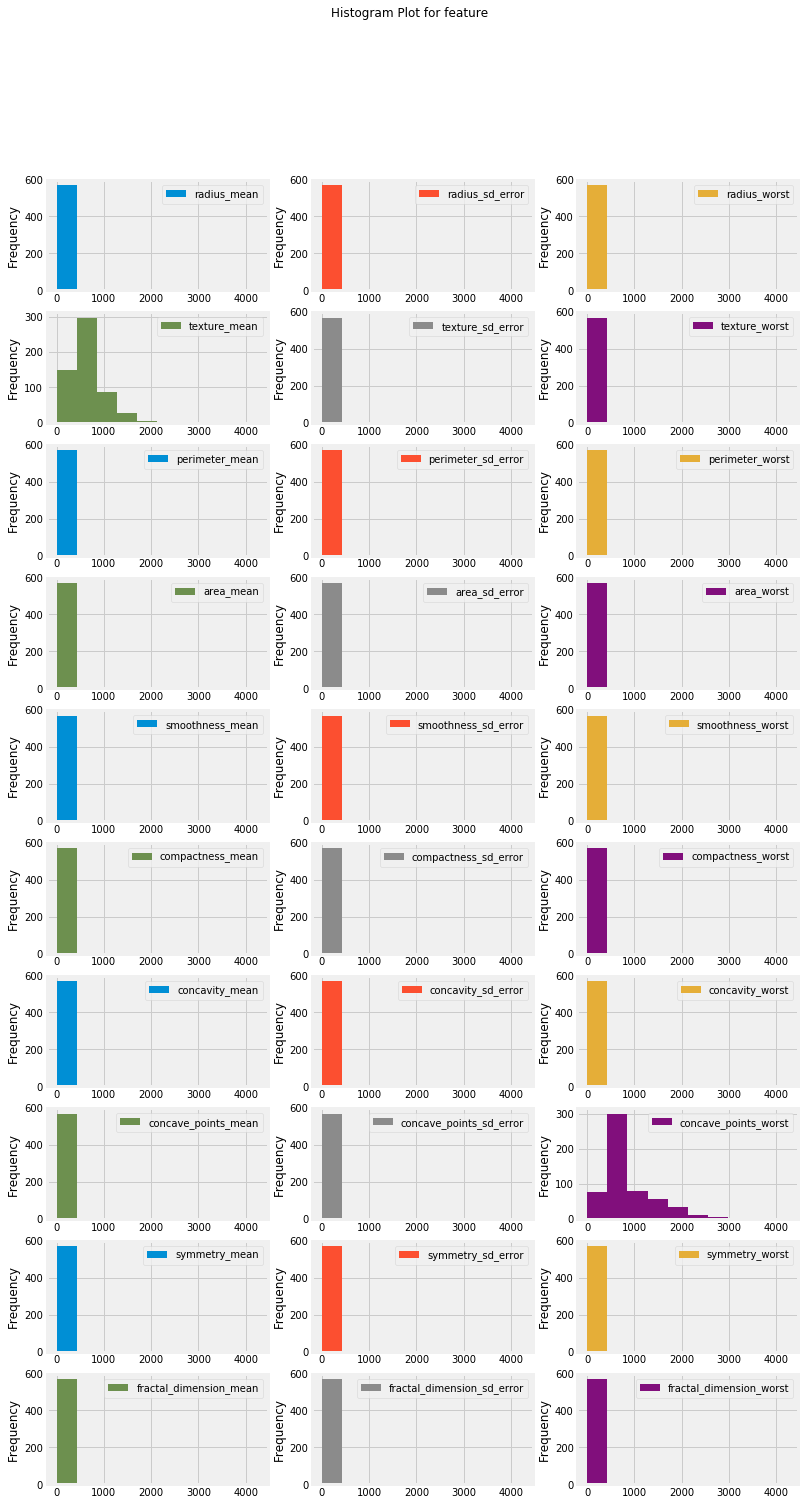

In [20]:
df.drop(dont_plot, axis=1).plot(kind='hist', subplots=True, layout=(10, 3), sharex=False, sharey=False, figsize = (12,24), title ='Histogram Plot for feature')

In [21]:
#df.corr()

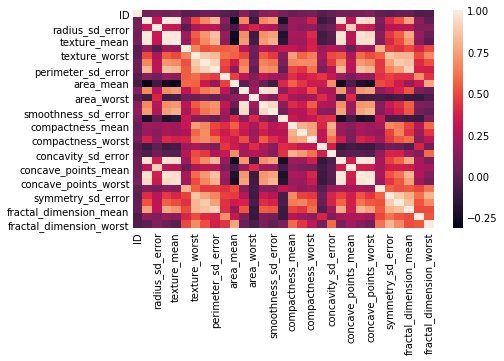

In [22]:
plt.subplots()
sns.heatmap(df.corr())

In [23]:
sns.pairplot(df)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [24]:
#I am recycling this function from the Ames housing project.
def find_redundant_features(data, Abbrev):
    redundant_home_features = []
    for i in df.columns:
        if Abbrev in i:
            redundant_home_features.append(i)
    return(redundant_home_features)

In [25]:
worst_list = find_redundant_features(df, 'worst')
error_list = find_redundant_features(df, 'error')
mean_list = find_redundant_features(df, 'mean')

In [26]:
print('We have:', len(results), 'total Columns of Data \n','We have:', len(worst_list + error_list + mean_list + dont_plot), 'columns of seperated data')

We have: 32 total Columns of Data 
 We have: 32 columns of seperated data


In [27]:
y = df.diagnosis
x = df.loc[:, 'radius_mean':] #All columns less ID and target

In [28]:
print(x.shape, y.shape)

(569, 30) (569,)


In [29]:
x_mean_features=df[mean_list]
x_worst_features = df[worst_list]
x_error_features = df[error_list]

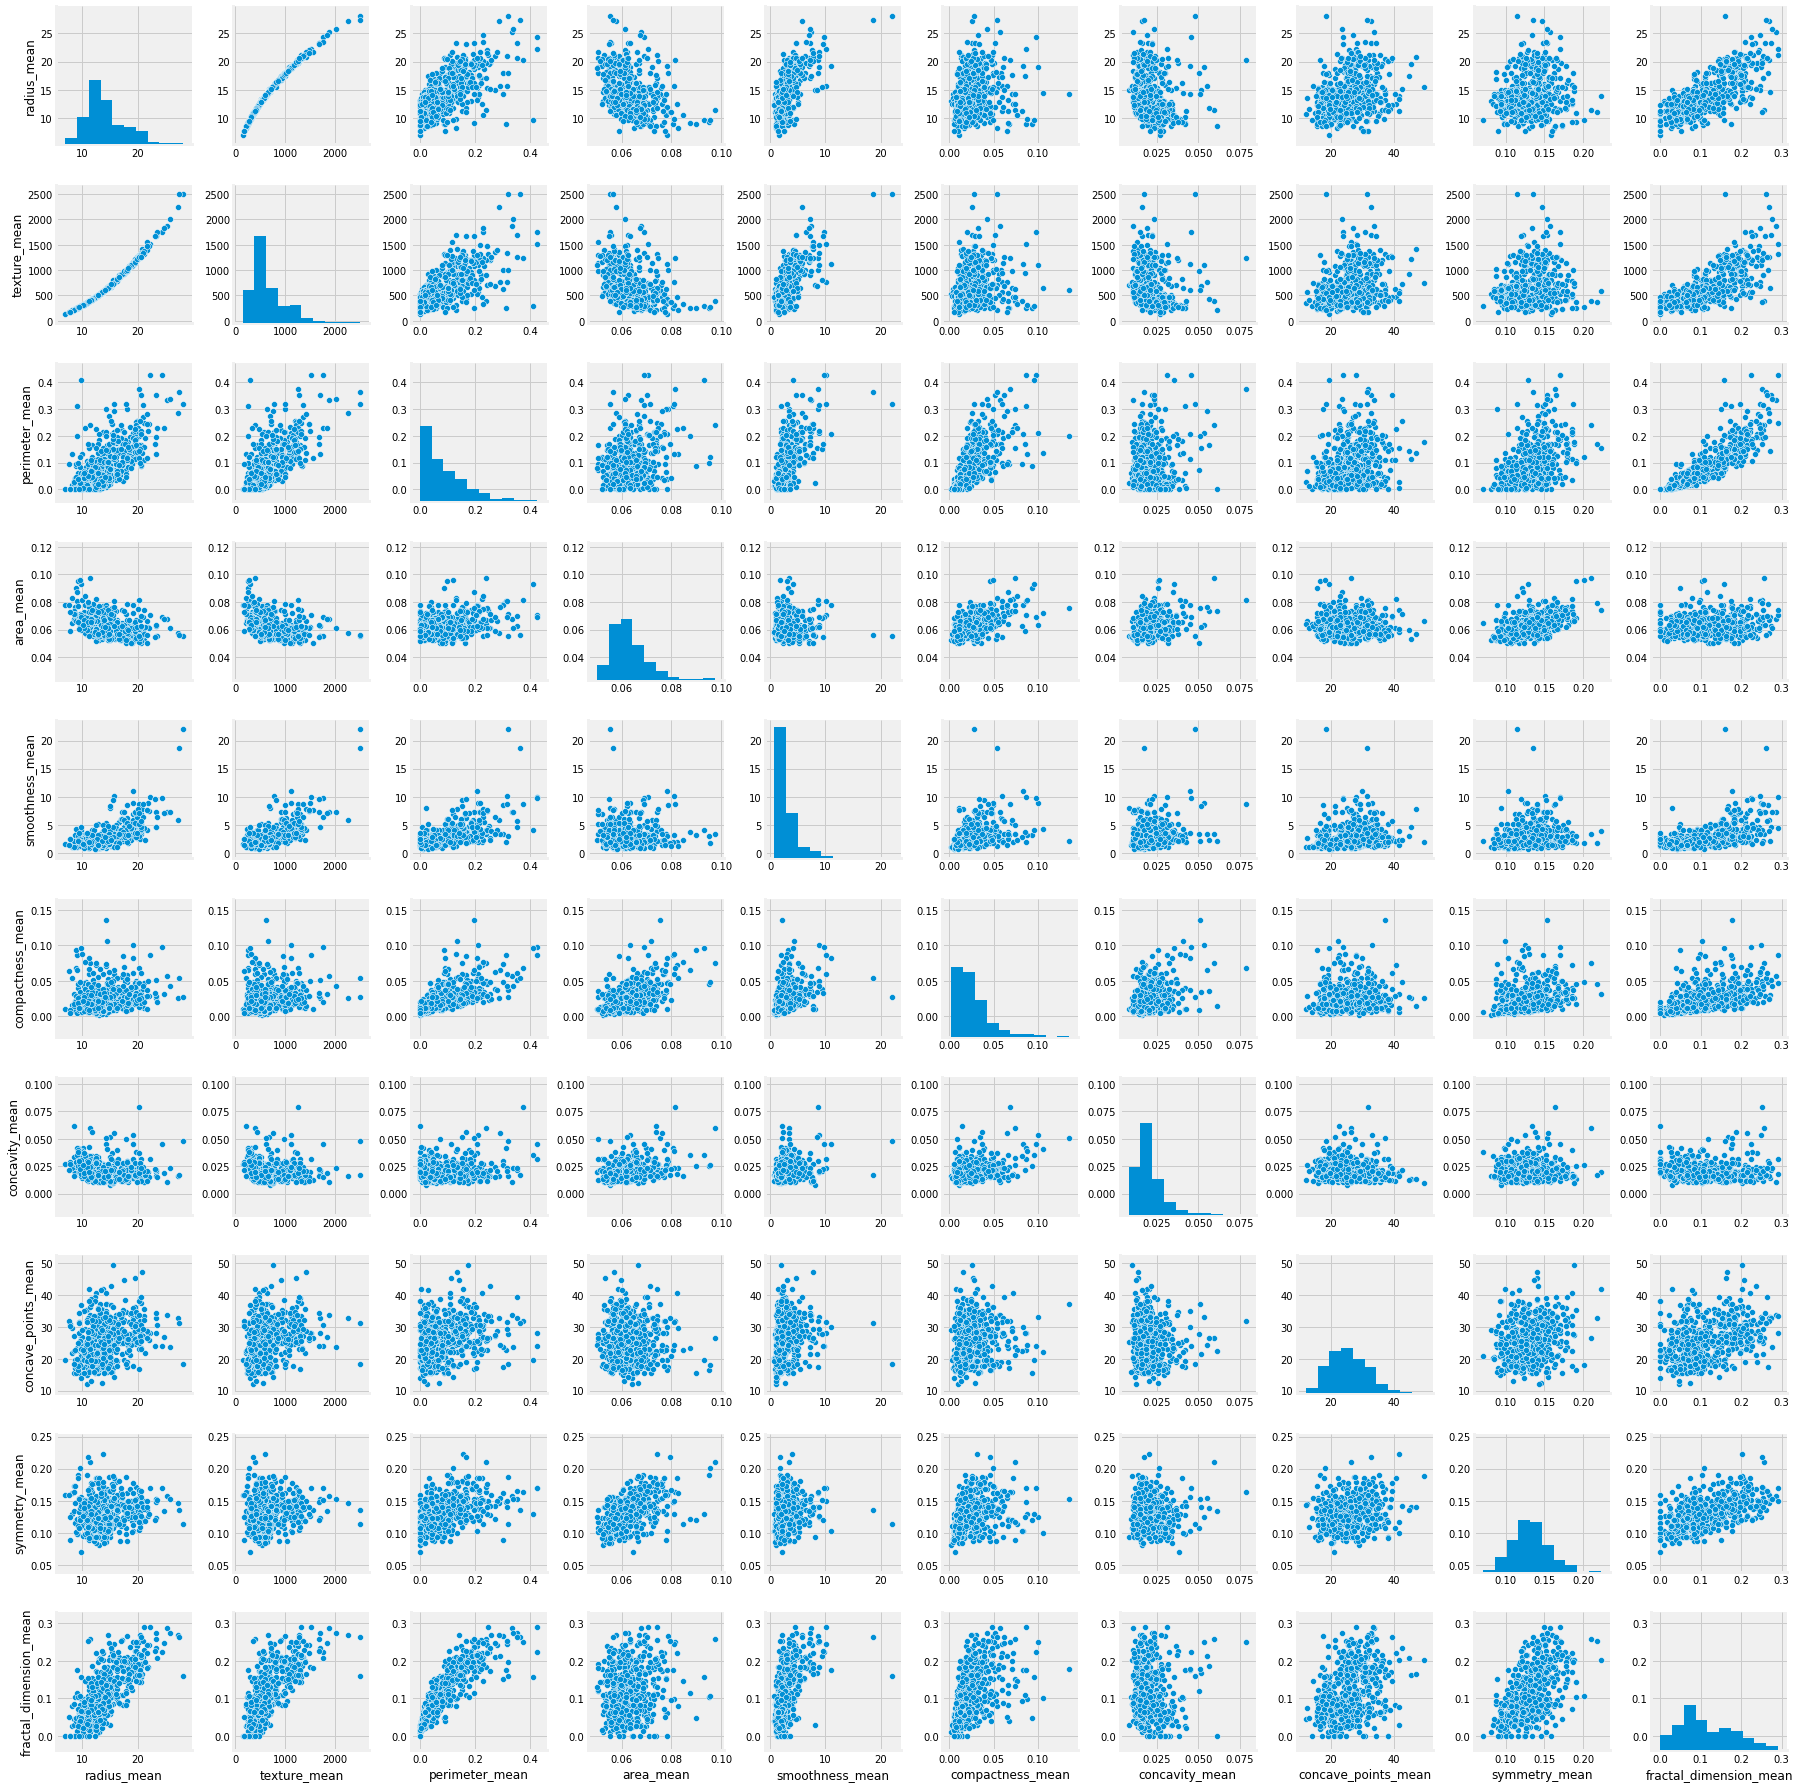

In [30]:
sns.pairplot(x_mean_features)

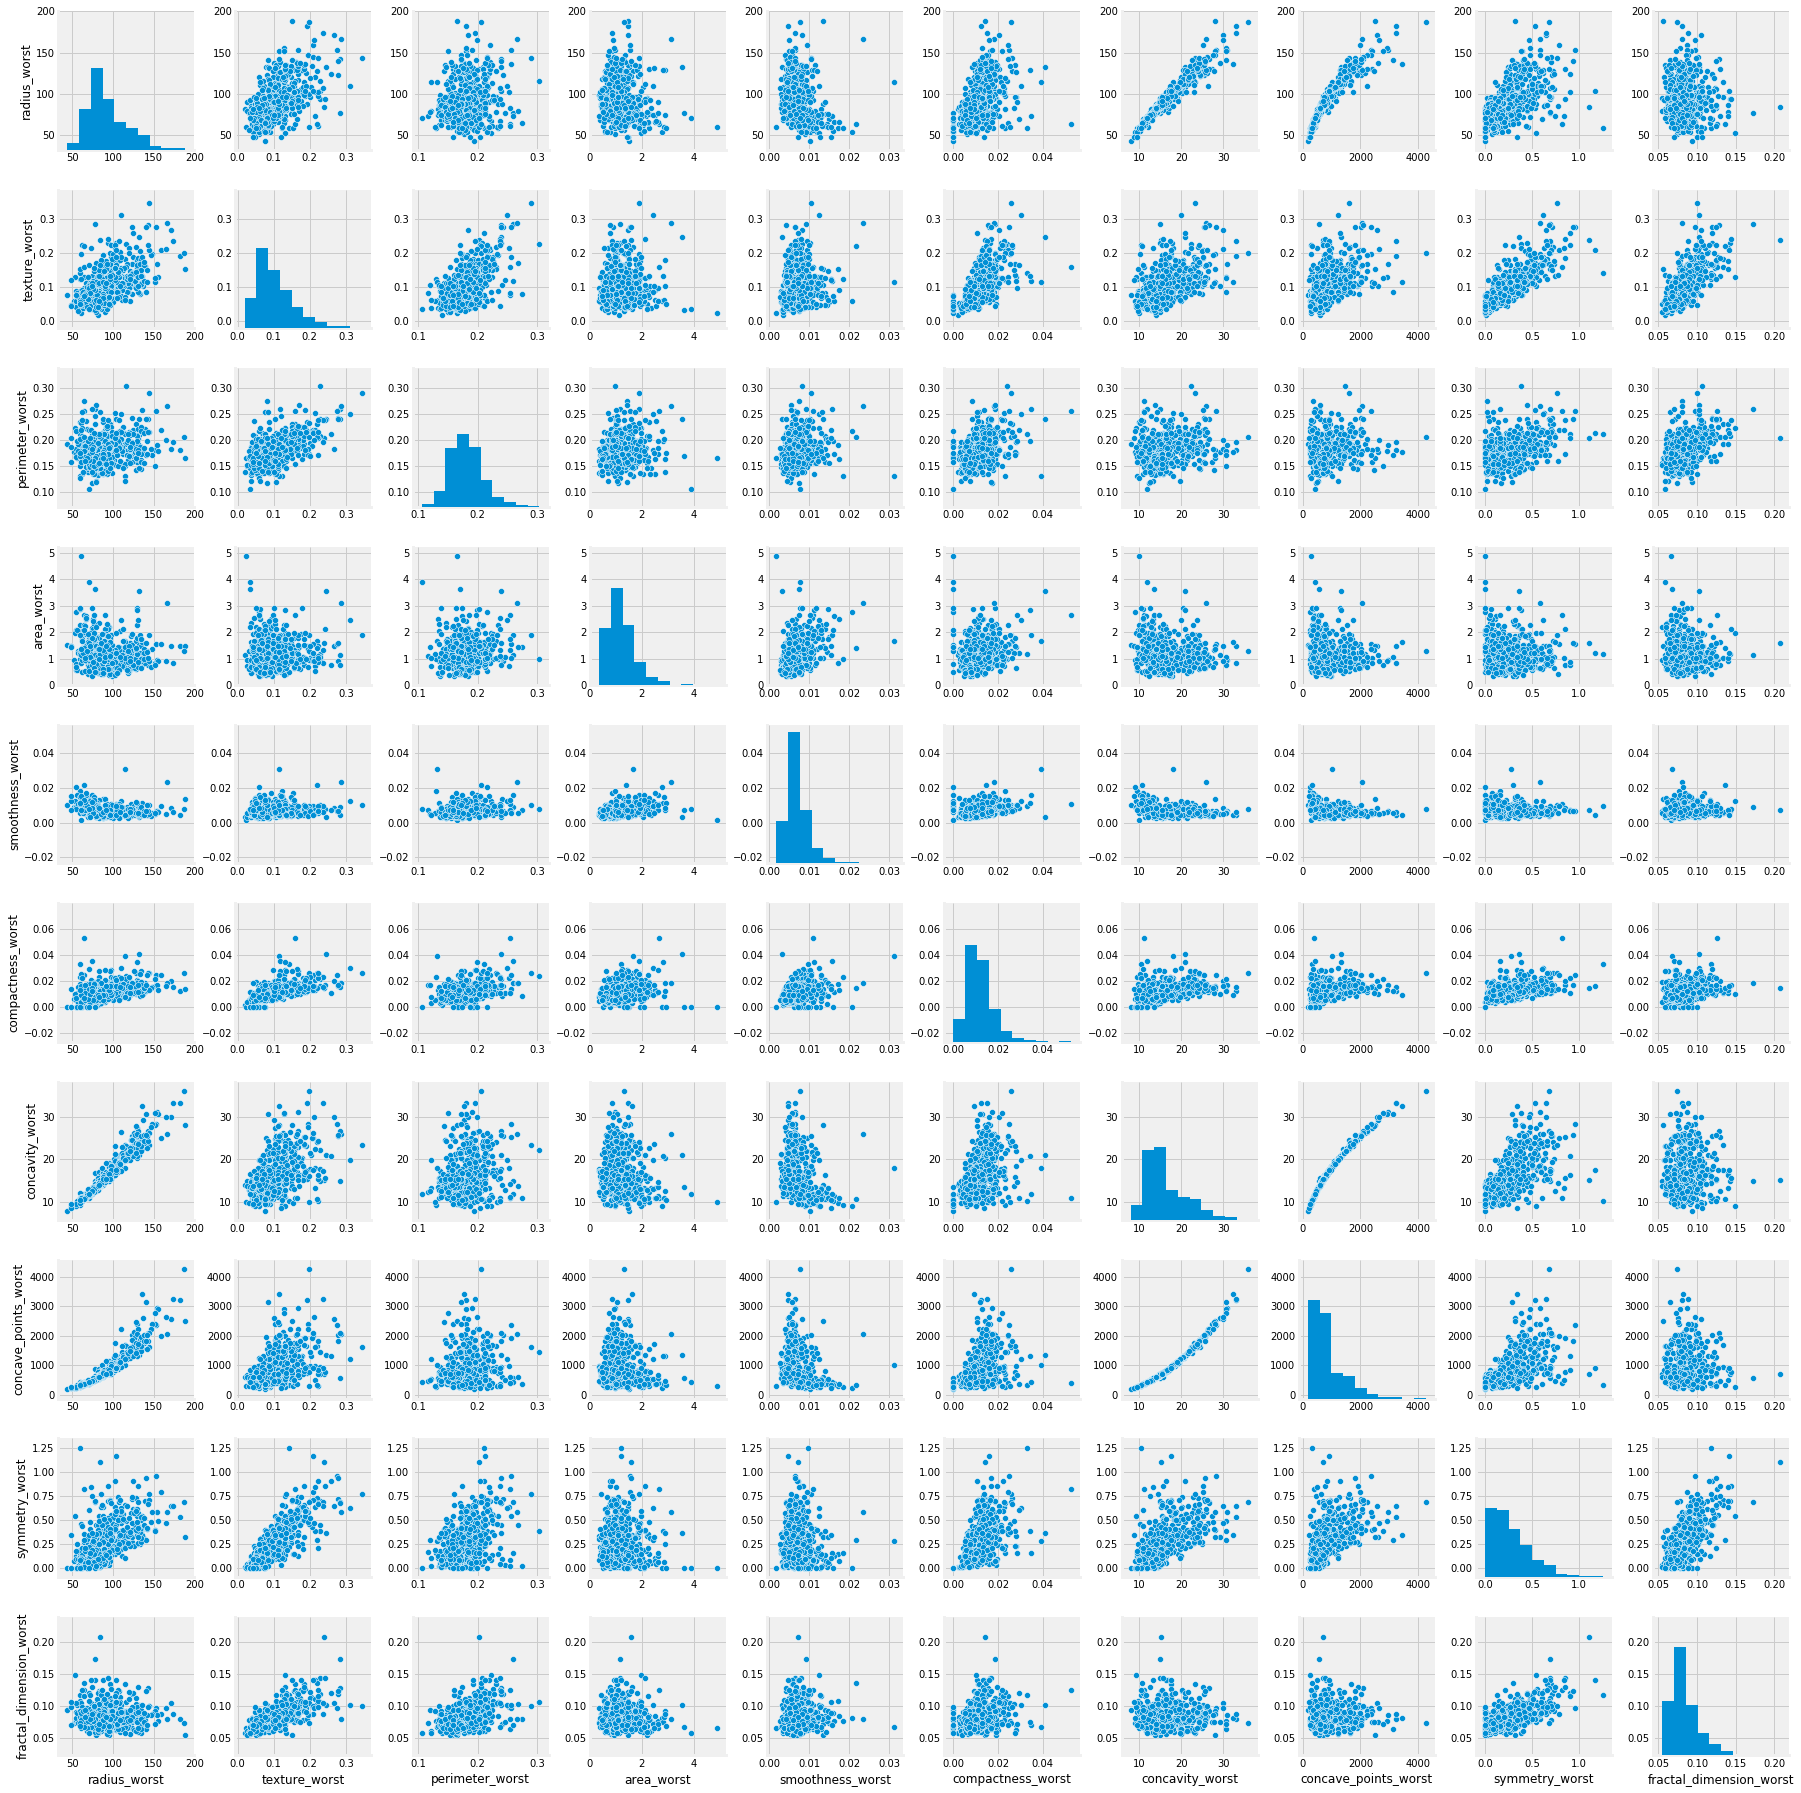

In [31]:
sns.pairplot(x_worst_features)

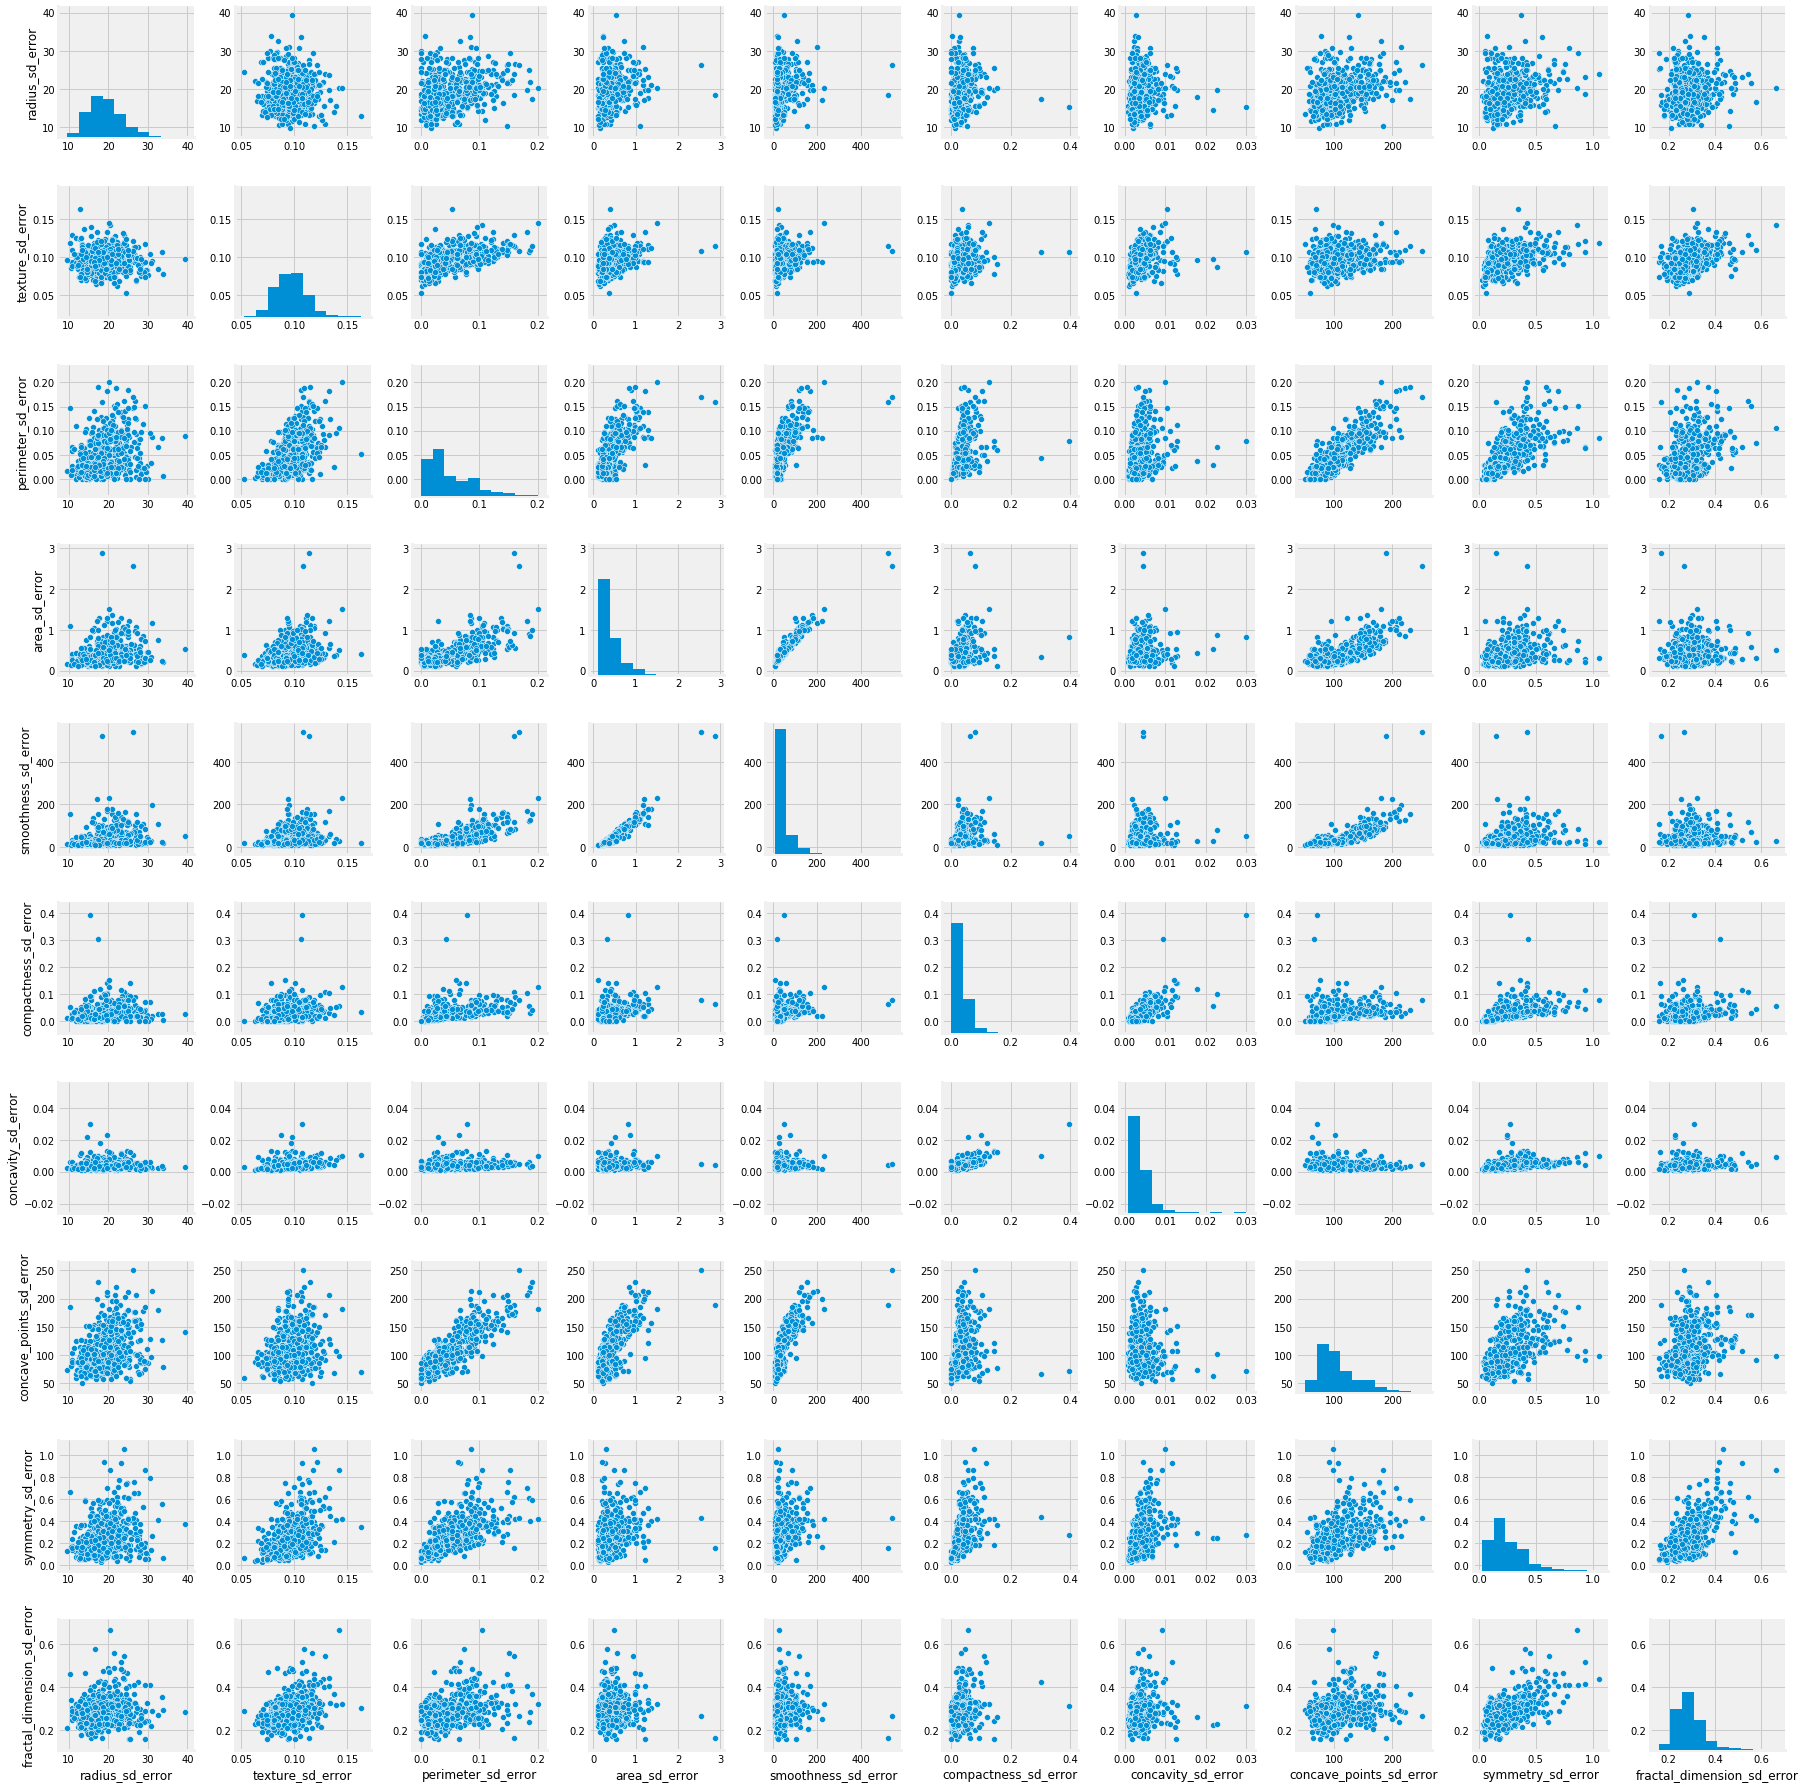

In [32]:
sns.pairplot(x_error_features)

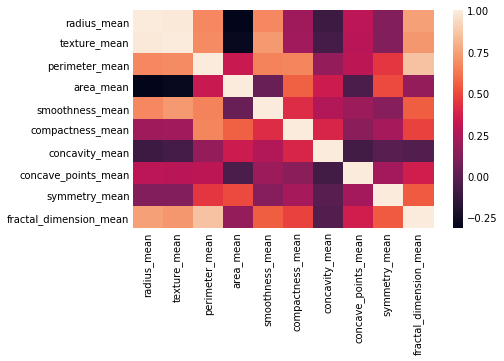

In [33]:
sns.heatmap(x_mean_features.corr())

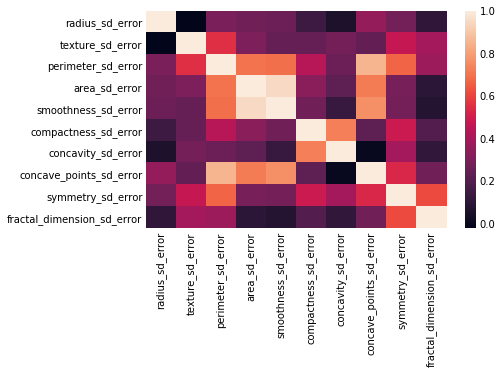

In [34]:
sns.heatmap(x_error_features.corr())

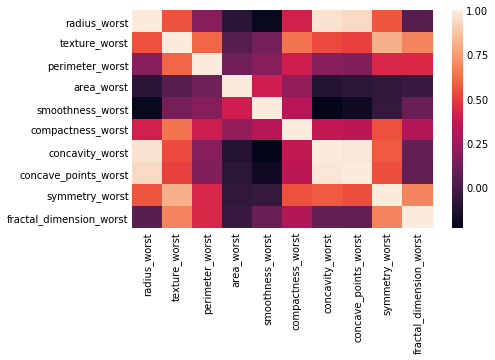

In [35]:
sns.heatmap(x_worst_features.corr())

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


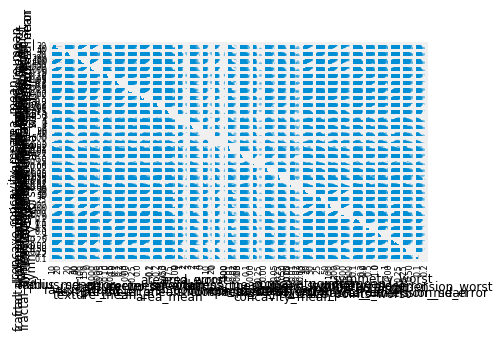

In [36]:
pd.tools.plotting.scatter_matrix(x)
#plt.tight_layout()
plt.show()

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


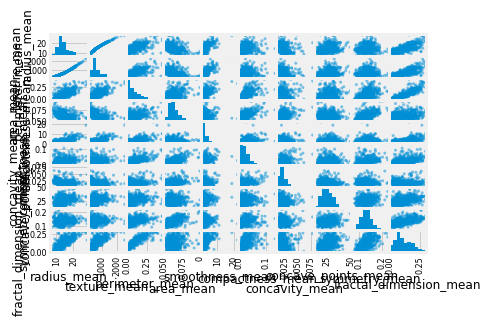

In [37]:
pd.tools.plotting.scatter_matrix(x_mean_features)
#plt.tight_layout()
plt.show()

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


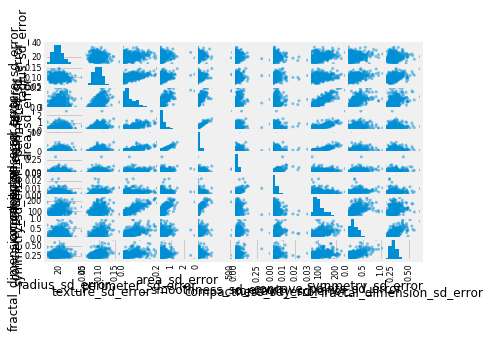

In [38]:
plt.figure(figsize=(12,15))
pd.tools.plotting.scatter_matrix(x_error_features)
#plt.tight_layout()
plt.show()

As I take a first look at data, I suspect that looking at features grouped by their worst, mean and sd_error will ultimately be unhelpfull. I will examine features by qualities. (radius, texture etc)

Ideally, I will have time to put this into a class function. For now:

In [39]:
radius_features = find_redundant_features(df, "radius")
texture_features = find_redundant_features(df, "texture")
perimeter_features = find_redundant_features(df, "perimeter")
area_features = find_redundant_features(df, "area")
smoothness_features = find_redundant_features(df, "smoothness")
compactness_features = find_redundant_features(df, "compactness")
concavity_features = find_redundant_features(df, "concavity")
symmetry_features = find_redundant_features(df, "symmetry")
fractal_features = find_redundant_features(df, "fractal_dimension")
concave_features = find_redundant_features(df, "concave")

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Radius variables')

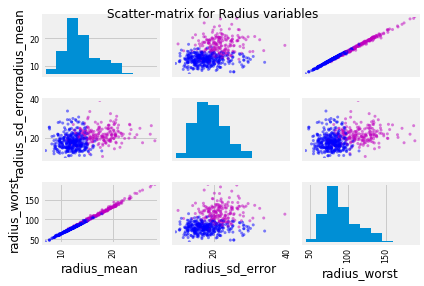

In [40]:
x_radius = df[radius_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x_radius, c = y)
plt.tight_layout()
plt.suptitle('Scatter-matrix for Radius variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Texture variables')

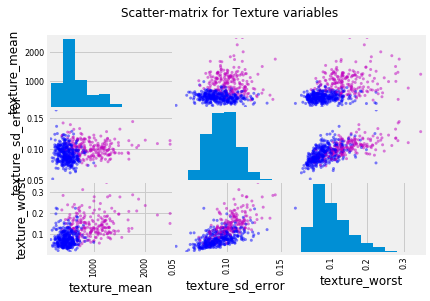

In [41]:
x = df[texture_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
#plt.tight_layout()
plt.suptitle('Scatter-matrix for Texture variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Perimeter variables')

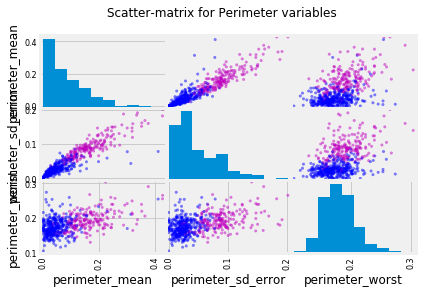

In [42]:
x = df[perimeter_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
#plt.tight_layout()
plt.suptitle('Scatter-matrix for Perimeter variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Area variables')

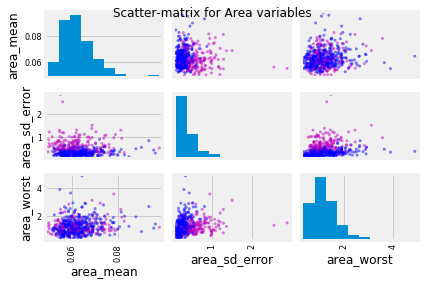

In [43]:
x = df[area_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
plt.tight_layout()
plt.suptitle('Scatter-matrix for Area variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Smoothness variables')

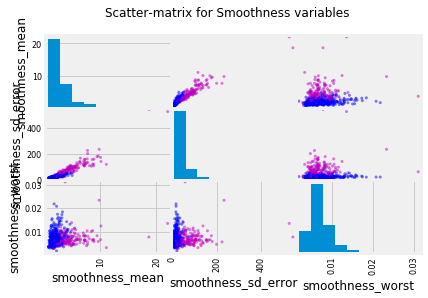

In [44]:
x_smoothness = df[smoothness_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x_smoothness, c = y)
#plt.tight_layout()
plt.suptitle('Scatter-matrix for Smoothness variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Compactness variables')

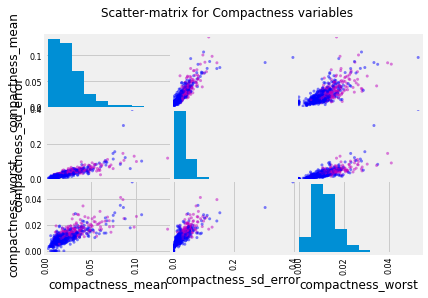

In [45]:
x_compactness = df[compactness_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x_compactness, c = y)
#plt.tight_layout()
plt.suptitle('Scatter-matrix for Compactness variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Concavity variables')

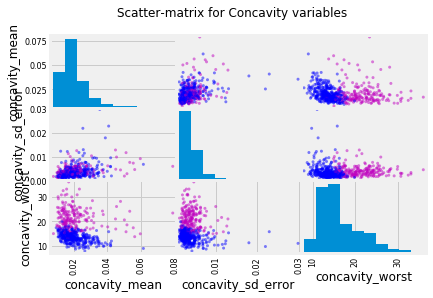

In [46]:
x = df[concavity_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
plt.suptitle('Scatter-matrix for Concavity variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Symmetry variables')

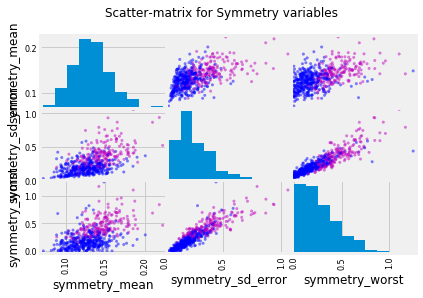

In [47]:
x = df[symmetry_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
plt.suptitle('Scatter-matrix for Symmetry variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Fractal variables')

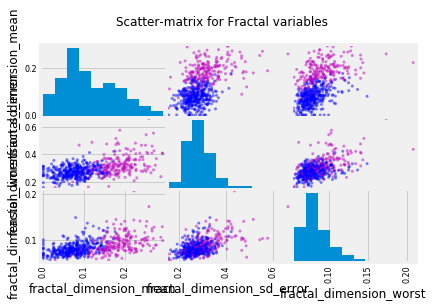

In [48]:
x = df[fractal_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
plt.suptitle('Scatter-matrix for Fractal variables')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Scatter-matrix for Concave variables')

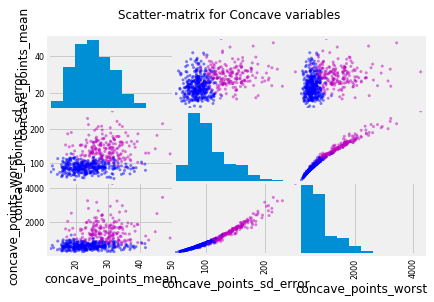

In [49]:
x = df[concave_features]
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(x, c = y)
plt.suptitle('Scatter-matrix for Concave variables')

In [50]:
df.query('diagnosis == "B"').describe()

ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  3.570000e+02   357.000000       357.000000    357.000000    357.000000   
mean   2.654382e+07    12.146524        17.914762     78.075406    462.790196   
std    1.167397e+08     1.780512         3.995125     11.807438    134.287118   
min    8.913000e+03     6.981000         9.710000     43.790000    143.500000   
25%    8.746620e+05    11.080000        15.150000     70.870000    378.200000   
50%    9.089160e+05    12.200000        17.390000     78.180000    458.400000   
75%    8.812816e+06    13.370000        19.760000     86.100000    551.100000   
max    9.113205e+08    17.850000        33.810000    114.600000    992.100000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        357.000000     357.000000      357.000000          357.000000   
mean           0.092478       0.080085        0.046058            0.025717   
std            0.013446       0.033750        0.043442            0.015909   
min            0.052630       0.019380        0.000000            0.000000   
25%            0.083060       0.055620        0.020310            0.015020   
50%            0.090760       0.075290        0.037090            0.023440   
75%            0.100700       0.097550        0.059990            0.032510   
max            0.163400       0.223900        0.410800            0.085340   

       perimeter_worst           ...             concavity_worst  \
count       357.000000           ...                  357.000000   
mean          0.174186           ...                   13.379801   
std           0.024807           ...                    1.981368   
min           0.106000           ...                    7.930000   
25%           0.158000           ...                   12.080000   
50%           0.171400           ...                   13.350000   
75%           0.189000           ...                   14.800000   
max           0.274300           ...                   19.820000   

       concave_points_mean  concave_points_sd_error  concave_points_worst  \
count           357.000000               357.000000            357.000000   
mean             23.515070                87.005938            558.899440   
std               5.493955                13.527091            163.601424   
min              12.020000                50.410000            185.200000   
25%              19.580000                78.270000            447.100000   
50%              22.820000                86.920000            547.400000   
75%              26.510000                96.590000            670.000000   
max              41.780000               127.100000           1210.000000   

       symmetry_mean  symmetry_sd_error  symmetry_worst  \
count     357.000000         357.000000      357.000000   
mean        0.124959           0.182673        0.166238   
std         0.020013           0.092180        0.140368   
min         0.071170           0.027290        0.000000   
25%         0.110400           0.112000        0.077080   
50%         0.125400           0.169800        0.141200   
75%         0.137600           0.230200        0.221600   
max         0.200600           0.584900        1.252000   

       fractal_dimension_mean  fractal_dimension_sd_error  \
count              357.000000                  357.000000   
mean                 0.074444                    0.270246   
std                  0.035797                    0.041745   
min                  0.000000                    0.156600   
25%                  0.051040                    0.240600   
50%                  0.074310                    0.268700   
75%                  0.097490                    0.298300   
max                  0.175000                    0.422800   

       fractal_dimension_worst  
count               357.000000  
mean                  0.079442  
std                   0.013804  
min                   0.055210  
25%                   0.070090

In [51]:
df.query('diagnosis == "M"').describe()

ID  radius_mean  radius_sd_error  radius_worst  texture_mean  \
count  2.120000e+02   212.000000       212.000000    212.000000    212.000000   
mean   3.681805e+07    17.462830        21.604906    115.365377    978.376415   
std    1.378965e+08     3.203971         3.779470     21.854653    367.937978   
min    8.670000e+03    10.950000        10.380000     71.900000    361.600000   
25%    8.613450e+05    15.075000        19.327500     98.745000    705.300000   
50%    8.953665e+05    17.325000        21.460000    114.200000    932.000000   
75%    8.911290e+06    19.590000        23.765000    129.925000   1203.750000   
max    9.112962e+08    28.110000        39.280000    188.500000   2501.000000   

       texture_sd_error  texture_worst  perimeter_mean  perimeter_sd_error  \
count        212.000000     212.000000      212.000000          212.000000   
mean           0.102898       0.145188        0.160775            0.087990   
std            0.012608       0.053987        0.075019            0.034374   
min            0.073710       0.046050        0.023980            0.020310   
25%            0.094010       0.109600        0.109525            0.064620   
50%            0.102200       0.132350        0.151350            0.086280   
75%            0.110925       0.172400        0.203050            0.103175   
max            0.144700       0.345400        0.426800            0.201200   

       perimeter_worst           ...             concavity_worst  \
count       212.000000           ...                  212.000000   
mean          0.192909           ...                   21.134811   
std           0.027638           ...                    4.283569   
min           0.130800           ...                   12.840000   
25%           0.174050           ...                   17.730000   
50%           0.189900           ...                   20.590000   
75%           0.209850           ...                   23.807500   
max           0.304000           ...                   36.040000   

       concave_points_mean  concave_points_sd_error  concave_points_worst  \
count           212.000000               212.000000            212.000000   
mean             29.318208               141.370330           1422.286321   
std               5.434804                29.457055            597.967743   
min              16.670000                85.100000            508.100000   
25%              25.782500               119.325000            970.300000   
50%              28.945000               138.000000           1303.000000   
75%              32.690000               159.800000           1712.750000   
max              49.540000               251.200000           4254.000000   

       symmetry_mean  symmetry_sd_error  symmetry_worst  \
count     212.000000         212.000000      212.000000   
mean        0.144845           0.374824        0.450606   
std         0.021870           0.170372        0.181507   
min         0.088220           0.051310        0.023980   
25%         0.130475           0.244475        0.326425   
50%         0.143450           0.356350        0.404900   
75%         0.155975           0.447850        0.556175   
max         0.222600           1.058000        1.170000   

       fractal_dimension_mean  fractal_dimension_sd_error  \
count              212.000000                  212.000000   
mean                 0.182237                    0.323468   
std                  0.046308                    0.074685   
min                  0.028990                    0.156500   
25%                  0.152750                    0.276500   
50%                  0.182000                    0.310300   
75%                  0.210675                    0.359225   
max                  0.291000                    0.663800   

       fractal_dimension_worst  
count               212.000000  
mean                  0.091530  
std                   0.021553  
min                   0.055040  
25%                   0.076302

In [52]:
x_compactness['diagnosis'] = y
x_smoothness['diagnosis'] = y

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
x_compactness.head()

compactness_mean  compactness_sd_error  compactness_worst diagnosis
0           0.04904               0.05373            0.01587         M
1           0.01308               0.01860            0.01340         M
2           0.04006               0.03832            0.02058         M
3           0.07458               0.05661            0.01867         M
4           0.02461               0.05688            0.01885         M

In [54]:
x_compactness.query('diagnosis == "B"').describe()

compactness_mean  compactness_sd_error  compactness_worst
count        357.000000            357.000000         357.000000
mean           0.021438              0.025997           0.009858
std            0.016352              0.032918           0.005709
min            0.002252              0.000000           0.000000
25%            0.011320              0.010990           0.006433
50%            0.016310              0.018400           0.009061
75%            0.025890              0.030560           0.011870
max            0.106400              0.396000           0.052790

In [55]:
x_compactness.query('diagnosis == "M"').describe()

compactness_mean  compactness_sd_error  compactness_worst
count        212.000000            212.000000         212.000000
mean           0.032281              0.041824           0.015060
std            0.018387              0.021603           0.005517
min            0.008422              0.011010           0.005174
25%            0.019662              0.026998           0.011415
50%            0.028590              0.037125           0.014205
75%            0.038910              0.050443           0.017497
max            0.135400              0.143800           0.040900

In [56]:
x_smoothness.query('diagnosis == "B"').describe()

smoothness_mean  smoothness_sd_error  smoothness_worst
count       357.000000           357.000000        357.000000
mean          2.000321            21.135148          0.007196
std           0.771169             8.843472          0.003061
min           0.757000             6.802000          0.001713
25%           1.445000            15.260000          0.005212
50%           1.851000            19.630000          0.006530
75%           2.388000            25.030000          0.008534
max           5.118000            77.110000          0.021770

In [57]:
x_smoothness.query('diagnosis == "M"').describe()

smoothness_mean  smoothness_sd_error  smoothness_worst
count       212.000000           212.000000        212.000000
mean          4.323929            72.672406          0.006780
std           2.568546            61.355268          0.002890
min           1.334000            13.990000          0.002667
25%           2.715500            35.762500          0.005085
50%           3.679500            58.455000          0.006209
75%           5.206250            94.000000          0.007971
max          21.980000           542.200000          0.031130

Initial examination of Mean and Median measures of smoothness suggest that larger smoothness_mean and smoothness_sd_error measures may relate to a diagnosis of Malignant. smoothness_worst will require further investigation. Initial examination of smoothness_worst does suggest that smaller measures may relate to a diagnosis of malignant.

# Evaluation of Smoothness

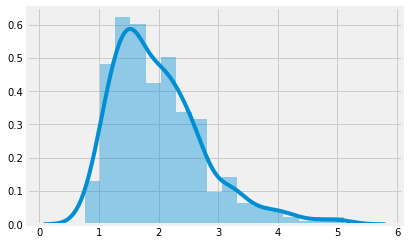

In [58]:
#List of smoothness of all B tumors
plot_ingB = []
plot_ingB = sorted(df['smoothness_mean'].loc[df['diagnosis']== 'B'])
sns.distplot(plot_ingB)

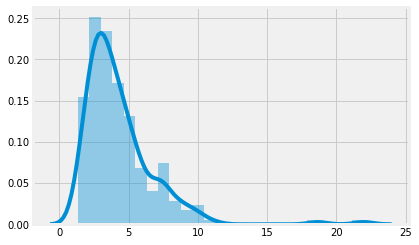

In [59]:
plot_ingM = []
plot_ingM = sorted(df['smoothness_mean'].loc[df['diagnosis']== 'M'])
sns.distplot(plot_ingM)

In [60]:
df['smoothness_mean'].loc[df['diagnosis']== 'M'].mean()

4.323929245283021

Text(0.5,0.98,'Distribution of Benign (RED) vs Malignant (BLUE) Smoothness Mean')

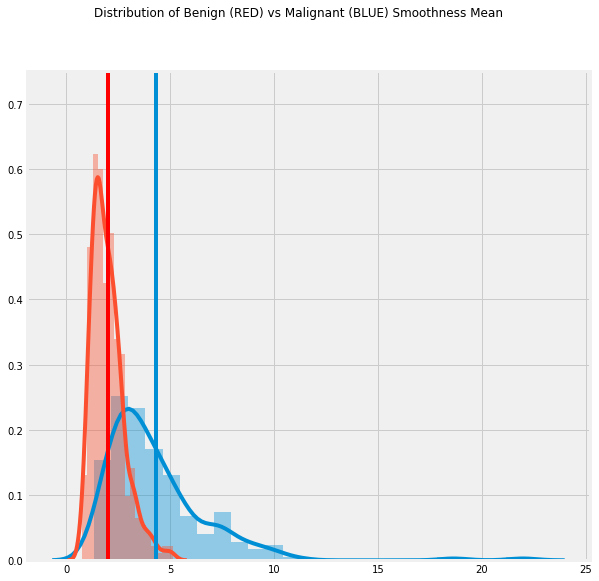

In [61]:
fig, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(plot_ingM)
sns.distplot(plot_ingB)
plt.ylim(0.00, 0.75)
plt.axvline(df['smoothness_mean'].loc[df['diagnosis']== 'M'].mean())
plt.axvline(df['smoothness_mean'].loc[df['diagnosis']== 'B'].mean(), label="Benign Mean", color = 'red')
plt.suptitle("Distribution of Benign (RED) vs Malignant (BLUE) Smoothness Mean")

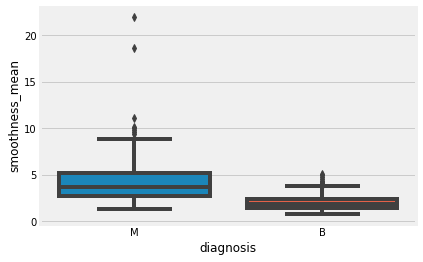

In [62]:
sns.boxplot(x= df['diagnosis'], y=df['smoothness_mean'])

Text(0.5,0.98,'Distribution of Benign vs Malignant Smoothness Worst')

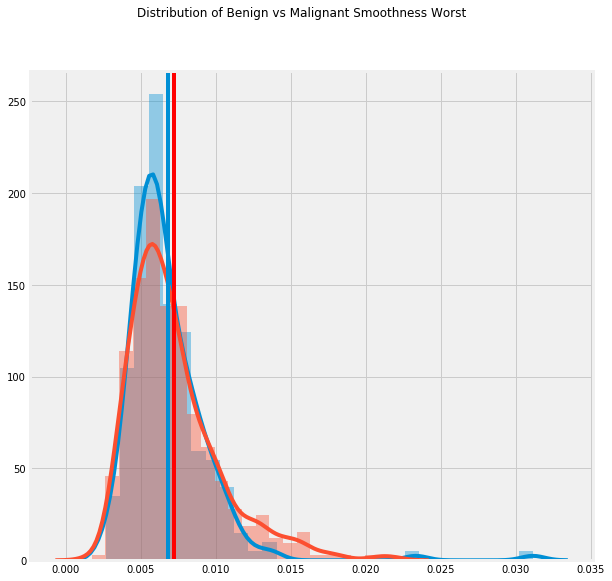

In [63]:
plot_ingM = []
plot_ingM = sorted(df['smoothness_worst'].loc[df['diagnosis']== 'M'])
plot_ingB = []
plot_ingB = sorted(df['smoothness_worst'].loc[df['diagnosis']== 'B'])

fig, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(plot_ingM)
sns.distplot(plot_ingB)
#plt.ylim(0.00, 0.75)
plt.axvline(df['smoothness_worst'].loc[df['diagnosis']== 'M'].mean())
plt.axvline(df['smoothness_worst'].loc[df['diagnosis']== 'B'].mean(), label="Benign Mean", color = 'red')
plt.suptitle("Distribution of Benign vs Malignant Smoothness Worst")

# Evaluation of Compactness

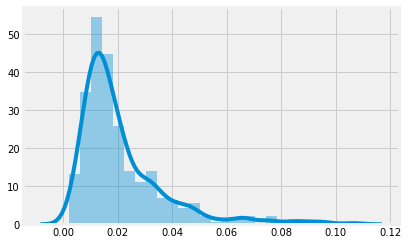

In [64]:
#List of Compactness of all B tumors
plot_ingB = []
plot_ingB = sorted(df['compactness_mean'].loc[df['diagnosis']== 'B'])
sns.distplot(plot_ingB)

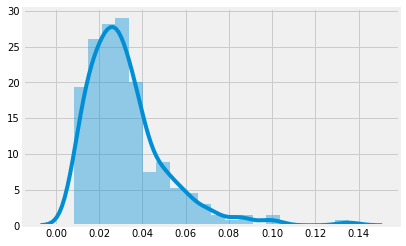

In [65]:
#List of compactness of all B tumors
plot_ingM = []
plot_ingM = sorted(df['compactness_mean'].loc[df['diagnosis']== 'M'])
sns.distplot(plot_ingM)

In [66]:
print(df['compactness_mean'].loc[df['diagnosis']== 'M'].mean())
print(df['compactness_mean'].loc[df['diagnosis']== 'B'].mean())

0.03228116509433961
0.02143824649859945


Text(0.5,0.98,'Distribution of Benign(RED) vs Malignant(BLUE) Compactness Mean')

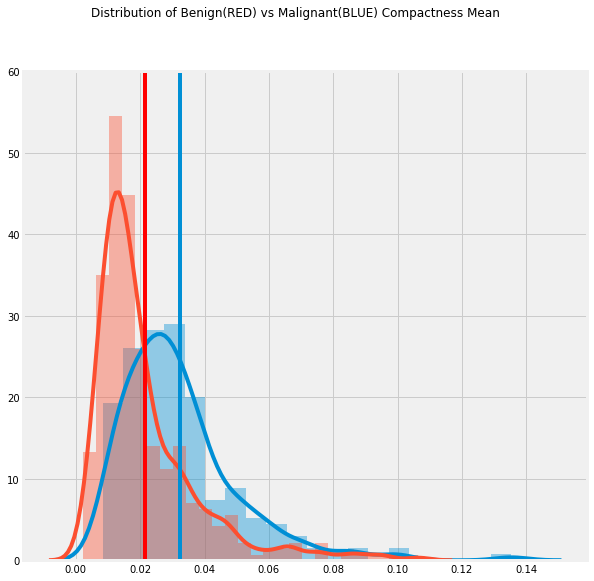

In [67]:
fig, ax = plt.subplots(1, figsize=(9, 9))
sns.distplot(plot_ingM)
sns.distplot(plot_ingB)
plt.ylim(0.00, 60.)
plt.axvline(df['compactness_mean'].loc[df['diagnosis']== 'M'].mean())
plt.axvline(df['compactness_mean'].loc[df['diagnosis']== 'B'].mean(), label="Benign Mean", color = 'red')
plt.suptitle("Distribution of Benign(RED) vs Malignant(BLUE) Compactness Mean")

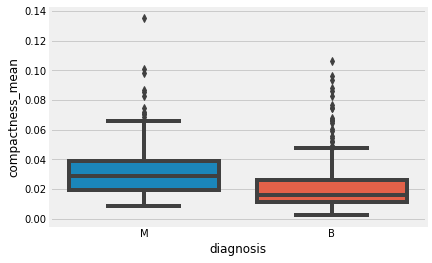

In [68]:
sns.boxplot(x= df['diagnosis'], y=df['compactness_mean'])

In [69]:
#I am recycling this function from another project. I did not write it, but found it handy with the housing datasets.
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [70]:
mosthighlycorrelated(df, 10)

FirstVariable           SecondVariable  Correlation
0              radius_mean             radius_worst     0.997855
1          concavity_worst  concave_points_sd_error     0.993708
2              radius_mean             texture_mean     0.987357
3             radius_worst             texture_mean     0.986507
4          concavity_worst     concave_points_worst     0.984015
5  concave_points_sd_error     concave_points_worst     0.977578
6            area_sd_error          smoothness_mean     0.972794
7             radius_worst  concave_points_sd_error     0.970387
8              radius_mean          concavity_worst     0.969539
9             radius_worst          concavity_worst     0.969476

# Initial Model built on unscaled Data

In [71]:
X = df.drop(dont_plot, axis=1)

In [72]:
print(X.shape, y.shape)

(569, 30) (569,)


In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=469, test_size=.5)

In [74]:
#Gaussian Naive Bayes model for binary classification model
gnb = GaussianNB()
#Train Classifier
gnModel = gnb.fit(x_train, y_train)
#Make a prediction
gnPred = gnb.predict(x_test)
#Measure accuracy
#print(accuracy_score(y_test, gnPred))

print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.94


# Secondary Model built with unscaled Data

In [75]:
#Support Vector classification Model
svm = SVC()
#Train Classifier
svm.fit(x_train, y_train)
#Make predictions
svmPred=svm.predict(x_test)
#measure accuracy
print(accuracy_score(y_test, svmPred))

print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test, y_test)))

0.635087719298
Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.64


In [76]:
#Support Vector classification Model using linear kernal type
svm = SVC(kernel='linear')
#Train Classifier
svm.fit(x_train, y_train)
#Make predictions
svmPred=svm.predict(x_test)
#measure accuracy
#print(accuracy_score(y_test, svmPred))

print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.96


In [77]:
#(Reminder to self: this is unscaled data)

In [78]:
svm.coef_

array([[ -1.05466234e+00,  -1.46740594e-01,   1.59931704e-01,
         -9.44629612e-03,   1.79988395e-01,   2.65327388e-01,
          5.06938778e-01,   3.02582356e-01,   3.17044857e-01,
          4.27003690e-02,   2.14052608e-01,  -2.44237825e-01,
         -4.74161178e-01,   4.19657129e-02,   1.97666843e-02,
         -2.51806203e-02,   4.86384107e-03,   2.92380981e-02,
          9.01443902e-02,   4.34984708e-04,   5.13239835e-01,
          2.41545244e-01,   3.72044991e-02,   5.00044882e-03,
          3.24407617e-01,   6.52765907e-01,   8.90276100e-01,
          3.98999940e-01,   9.46211493e-01,   1.32333603e-01]])

# Third model using unscaled Data

In [79]:
# make an instance of a KNeighborsClassifier object with 3 neighbor
knn = KNeighborsClassifier(n_neighbors=3)

# train on the unstandardized data:
knn.fit(x_train, y_train)
#Make predictions
knnPred = knn.predict(x_test)
#Measure accuracy
#print(accuracy_score(y_test, knnPred))

print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of KNN classifier on training set: 0.95
Accuracy of KNN classifier on test set: 0.92


In [80]:
knn_cnf = confusion_matrix(y_test, knnPred)
knn_report = classification_report(numpy.asarray(y_test),numpy.asarray(knnPred))
print("Classification Report for KNN Model\n", knn_report)
print(knn_cnf)
#Measure accuracy
print(accuracy_score(y_test, knnPred))

Classification Report for KNN Model
              precision    recall  f1-score   support

          B       0.92      0.96      0.94       181
          M       0.92      0.85      0.88       104

avg / total       0.92      0.92      0.92       285

[[173   8]
 [ 16  88]]
0.915789473684


In [81]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'.format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'.format(lda.score(x_test, y_test)))

Accuracy of LDA classifier on training set: 0.97
Accuracy of LDA classifier on test set: 0.96


# Principal Component Analysis on Standardized Data

In [82]:
print(X.shape, y.shape)

(569, 30) (569,)


In [83]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [84]:
print(Xs.min(), Xs.max(), Xs.mean(), Xs.std())
Xs = pd.DataFrame(Xs, index=X.index, columns=X.columns)

-3.11208478792 12.0726803996 1.24875700485e-18 1.0


In [85]:
Xs.apply(np.mean)

radius_mean                  -1.256562e-16
radius_sd_error               1.049736e-16
radius_worst                 -1.272171e-16
texture_mean                 -1.900452e-16
texture_sd_error              1.490704e-16
texture_worst                 2.544342e-16
perimeter_mean               -1.338511e-16
perimeter_sd_error           -8.429110e-17
perimeter_worst               2.081912e-16
area_mean                     5.408679e-16
area_sd_error                 2.475807e-16
area_worst                   -9.912009e-17
smoothness_mean              -2.968237e-16
smoothness_sd_error          -1.088760e-16
smoothness_worst              4.426014e-16
compactness_mean              1.958988e-16
compactness_sd_error          1.678017e-16
compactness_worst             2.185325e-17
concavity_mean                1.523874e-16
concavity_sd_error           -5.658430e-17
concavity_worst              -7.988142e-16
concave_points_mean          -1.834112e-17
concave_points_sd_error      -4.015534e-16
concave_poi

In [86]:
Xs.apply(np.std)

radius_mean                   1.0
radius_sd_error               1.0
radius_worst                  1.0
texture_mean                  1.0
texture_sd_error              1.0
texture_worst                 1.0
perimeter_mean                1.0
perimeter_sd_error            1.0
perimeter_worst               1.0
area_mean                     1.0
area_sd_error                 1.0
area_worst                    1.0
smoothness_mean               1.0
smoothness_sd_error           1.0
smoothness_worst              1.0
compactness_mean              1.0
compactness_sd_error          1.0
compactness_worst             1.0
concavity_mean                1.0
concavity_sd_error            1.0
concavity_worst               1.0
concave_points_mean           1.0
concave_points_sd_error       1.0
concave_points_worst          1.0
symmetry_mean                 1.0
symmetry_sd_error             1.0
symmetry_worst                1.0
fractal_dimension_mean        1.0
fractal_dimension_sd_error    1.0
fractal_dimens

In [87]:
pca = PCA()
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
pca.components_[0]

array([ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
        0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
        0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
        0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
        0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
        0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394])

In [89]:
print(pca.n_components_, pca.noise_variance_)

30 0.0


In [90]:
#pca.get_params

In [91]:
pca4 = PCA(n_components=4)
pca4_fitted=pca4.fit(Xs)

print(pca4.n_components_, pca4.noise_variance_)

4 0.239977455024


In [92]:
#pca4.components_
pca4_fitted.explained_variance_ratio_

array([ 0.44272026,  0.18971182,  0.09393163,  0.06602135])

In [93]:
results.remove('ID')
results.remove('diagnosis')

In [94]:
#results

In [95]:
df_feature_importance = pd.DataFrame(results)

In [96]:
df_feature_importance.head()

0
0       radius_mean
1   radius_sd_error
2      radius_worst
3      texture_mean
4  texture_sd_error

In [97]:
df_feature_importance['Coef_'] = pca.components_[0]

In [98]:
#pca.components_[29]

In [99]:
df_feature_importance.shape

(30, 2)

# Determining Features using SKlearn Feature Selection

In [100]:
Xs.shape

(569, 30)

In [101]:
#feature extraction
skb = SelectKBest(score_func=chi2, k=4)
skb_fit = skb.fit(X, y)

In [102]:
# summarize scores
numpy.set_printoptions(precision=3)
print(skb_fit.scores_)
features = skb_fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  2.661e+02   9.390e+01   2.011e+03   5.399e+04   1.499e-01   5.403e+00
   1.971e+01   1.054e+01   2.574e-01   7.431e-05   3.468e+01   9.794e-03
   2.506e+02   8.759e+03   3.266e-03   6.138e-01   1.045e+00   3.052e-01
   8.036e-05   6.371e-03   4.917e+02   1.744e+02   3.665e+03   1.126e+05
   3.974e-01   1.931e+01   3.952e+01   1.349e+01   1.299e+00   2.315e-01]
[[ 1001.     153.4    184.6   2019.  ]
 [ 1326.      74.08   158.8   1956.  ]
 [ 1203.      94.03   152.5   1709.  ]
 [  386.1     27.23    98.87   567.7 ]
 [ 1297.      94.44   152.2   1575.  ]]


In [103]:
features.shape

(569, 4)

In [104]:
df_feature_importance['KBestScore'] = skb_fit.scores_

In [105]:
df_feature_importance.sort_values('KBestScore', ascending=False).head(7)

0     Coef_     KBestScore
23     concave_points_worst  0.224871  112598.431564
3              texture_mean  0.220995   53991.655924
13      smoothness_sd_error  0.202870    8758.504705
22  concave_points_sd_error  0.236640    3665.035416
2              radius_worst  0.227537    2011.102864
20          concavity_worst  0.227997     491.689157
0               radius_mean  0.218902     266.104917

In [106]:
print(X.shape, y.shape)

(569, 30) (569,)


In [107]:
svm_rfe = RFE(svm, 4)
svm_fitted_rfe = svm_rfe.fit(X, y)
print("Num Features: ", svm_fitted_rfe.n_features_)
print("Selected Features: ", svm_fitted_rfe.support_)
print("Feature Ranking: ", svm_fitted_rfe.ranking_)

Num Features:  4
Selected Features:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True False]
Feature Ranking:  [ 5 18 13 27 10  9  6  7  8 24 22  3 11 19 20 16 15 17 25 23  4 12 21 26  2
  1  1  1  1 14]


In [108]:
df_feature_importance['Selected']= svm_fitted_rfe.support_

In [109]:
df_feature_importance.query('Selected == True')

0     Coef_  KBestScore  Selected
25           symmetry_sd_error  0.210096   19.314922      True
26              symmetry_worst  0.228768   39.516915      True
27      fractal_dimension_mean  0.250886   13.485419      True
28  fractal_dimension_sd_error  0.122905    1.298861      True

In [110]:
df_feature_importance['Rank']= svm_fitted_rfe.ranking_

In [111]:
key_features= []
df_feature_importance = df_feature_importance.query('Rank <= 2')
key_features= df_feature_importance[0].tolist()

In [112]:
key_features

['symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error']

C:\Users\Elizabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


Text(0.5,0.98,'Scatter-matrix for key features')

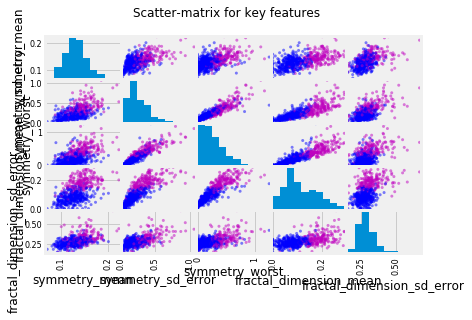

In [113]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(df[key_features], c = y)
plt.suptitle('Scatter-matrix for key features')

# Bootstraping

In [127]:
print(df.shape, X.shape, y.shape) #X has ID column removed

(569, 32) (569, 30) (569,)


In [128]:
X_bs = X.values
y_bs = y.values

In [129]:
n_iterations = 10
n_size = 285

for i in range(10):
    bs_train = resample(X_bs, n_samples=n_size)
    bs_test = numpy.array([i for i in X_bs if X_bs.tolist() not in bs_train.tolist()])
    

Explanation:
We built 3 seperate models for analysis with consistant results.
-Limitations:
    -relatively small dataset
    -summary data for each tumer
-Next steps:
    -Focus on significant features(measures of symmetry and fractal dimension)
        -Is the raw data available for analysis
            -Does tumor shape relate to diagnosis?

For this modeling challenge, I built a classification model that can predict with accuracy between 92 and 96 % if a tumor will be diagnosed as either benign or malignant.

To start, I collect the data and examine it for problems, such as missing values or data that is inconsistant with logic and good reason. This is usually done with graphs and charts.

I then use a combination of statistical analysis and machine learning techniques to 'teach' the computer to predict which tumors might be malignant, and which might be benign. I then compare the best guess against the known answer to determine accuracy of the model.